In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv("/content/transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
df.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [ ]:
df.shape

(748, 5)

In [ ]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
df.columns = ["Recency", "Frequency", "Monetary", "Time", "Donated"]

In [ ]:
print("Shape of Data:",df.shape)
r,c = df.shape
print("number of Rows:",r)
print("Number of Columns:",c)

Shape of Data: (748, 5)
number of Rows: 748
Number of Columns: 5


In [ ]:
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Use the new column name 'Donated' after renaming
scaled_features = scaler.fit_transform(df.drop(columns=["Donated"]))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

scaled_df["Donated"] = df["Donated"].values # Use the new column name here as well

# Display the transformed DataFrame
print("\nTransformed DataFrame:")
print(scaled_df.head())


Transformed DataFrame:
    Recency  Frequency  Monetary      Time  Donated
0  0.027027   1.000000  1.000000  1.000000        1
1  0.000000   0.244898  0.244898  0.270833        1
2  0.013514   0.306122  0.306122  0.343750        1
3  0.027027   0.387755  0.387755  0.447917        1
4  0.013514   0.469388  0.469388  0.781250        0


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Donated'}>, <Axes: >]], dtype=object)

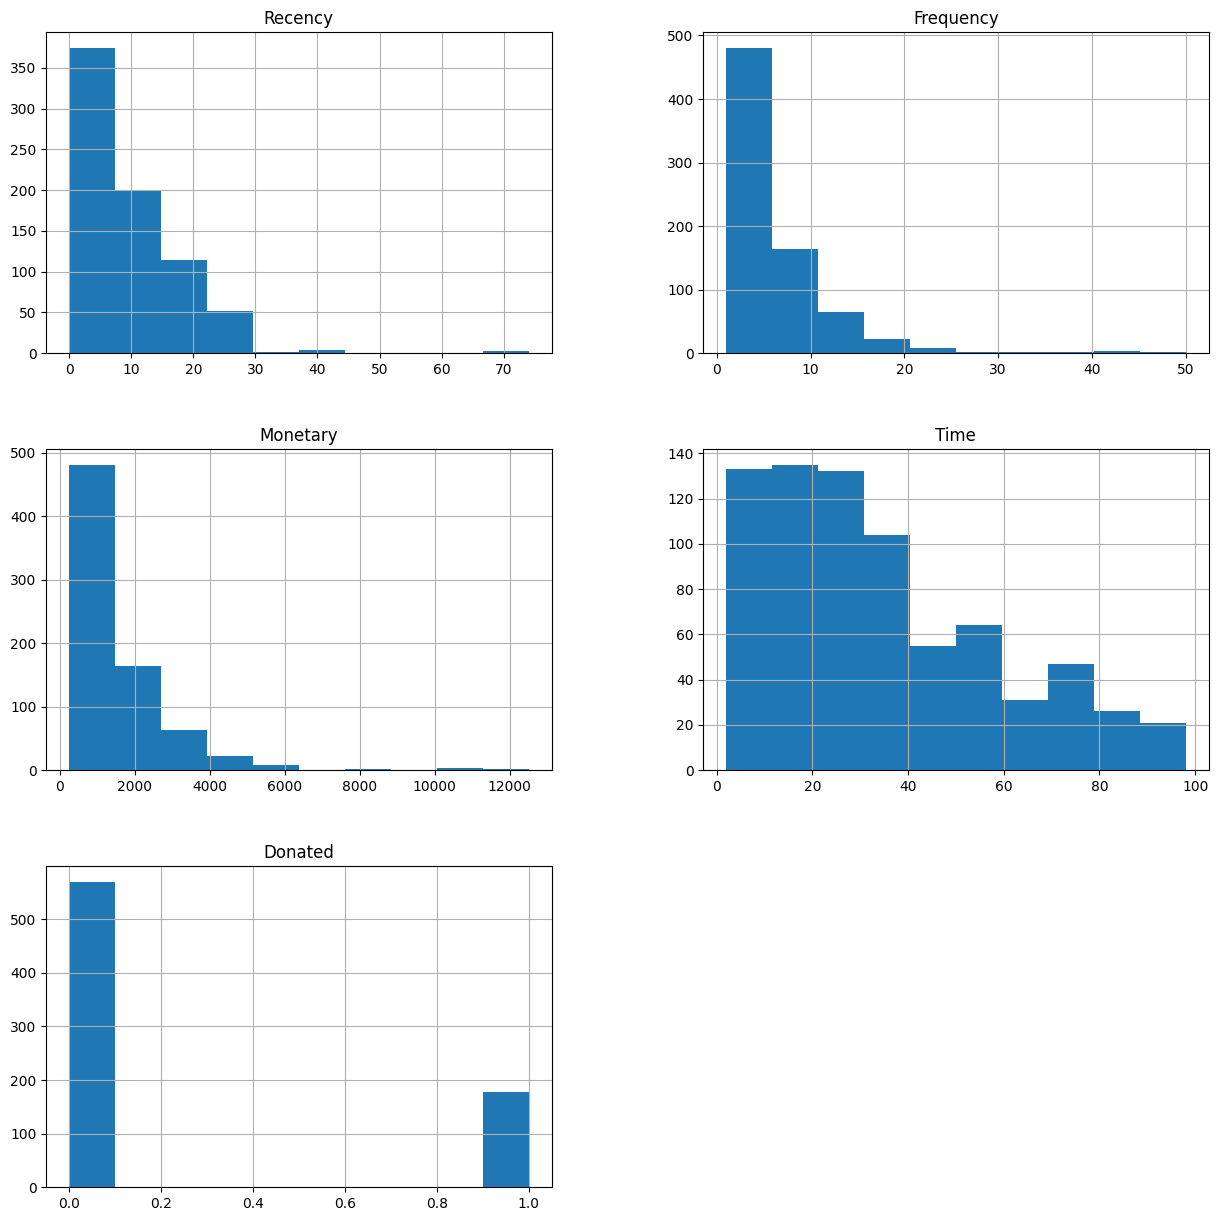

In [ ]:
df.hist(figsize=(15, 15))

In [ ]:
X = df.drop("Donated", axis=1)
y = df["Donated"]

In [ ]:
pd.set_option('max_colwidth',20)

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
pd.set_option('display.max_rows',50)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df = pd.read_csv("/content/transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


**DATA PREPARATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
df.shape


(748, 5)

**handling null values**

In [ ]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

**handling outliers**



<Axes: >

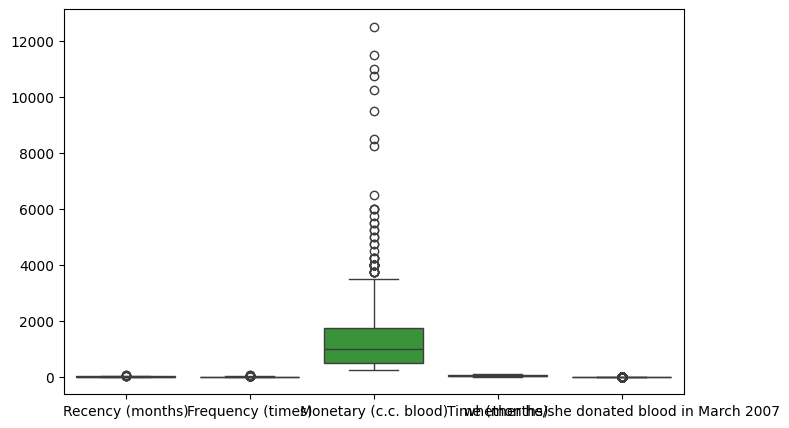

In [ ]:
sns.boxplot(df)

In [ ]:
print(df.columns)

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')


In [ ]:
Q1=df['Monetary (c.c. blood)'].quantile(0.25)
Q3=df['Monetary (c.c. blood)'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
df=df[(df['Monetary (c.c. blood)']>=lower_bound) & (df['Monetary (c.c. blood)']<=upper_bound)]

In [ ]:

print("Chance of donation where donor is having low recency:", df[df["Recency (months)"]<3]['whether he/she donated blood in March 2007'].mean())

print("Chance of donation where donor is having high recency:", df [df["Recency (months)"]>14] ['whether he/she donated blood in March 2007'].mean())

print("....................................")

print("Chance of donation where donor is having low Frequency:", df [df ["Frequency (times)"]<2]['whether he/she donated blood in March 2007'].mean())

print("Chance of donation where donor is having high Frequency:", df [df["Frequency (times)"]>6] ['whether he/she donated blood in March 2007'].mean())
print("..............................")
print("Chance of donation where donor is having low Monetary:", df [df["Monetary (c.c. blood)"]<500] ['whether he/she donated blood in March 2007'].mean())
print("Chance of donation where donor is having high Monetary:", df [df["Monetary (c.c. blood)"]>1500]['whether he/she donated blood in March 2007'].mean())

print(". ..")
print("Chance of donation where donor is having low Time:",df[df["Time (months)"]<14] ['whether he/she donated blood in March 2007'].mean())

print("Chance of donation where donor is having high Time:" ,df [df["Time (months)"]>46]['whether he/she donated blood in March 2007'].mean())

Chance of donation where donor is having low recency: 0.35260115606936415
Chance of donation where donor is having high recency: 0.07228915662650602
....................................
Chance of donation where donor is having low Frequency: 0.12658227848101267
Chance of donation where donor is having high Frequency: 0.3235294117647059
..............................
Chance of donation where donor is having low Monetary: 0.12658227848101267
Chance of donation where donor is having high Monetary: 0.3235294117647059
. ..
Chance of donation where donor is having low Time: 0.26666666666666666
Chance of donation where donor is having high Time: 0.1566265060240964


**EXPLORATORY DATA ANALYSIS**

 **1.Descriptive stastical**

In [ ]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,9.645804,4.448080,1112.019915,31.783784,0.224751
std,8.163291,3.391765,847.941140,22.512267,0.417715
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,14.000000,0.000000
50%,9.000000,3.000000,750.000000,26.000000,0.000000
75%,14.000000,6.000000,1500.000000,46.000000,0.000000
max,74.000000,14.000000,3500.000000,98.000000,1.000000


**2.VISUAL ANALYSIS**

array([[<Axes: title={'center': 'Recency (months)'}>,
        <Axes: title={'center': 'Frequency (times)'}>],
       [<Axes: title={'center': 'Monetary (c.c. blood)'}>,
        <Axes: title={'center': 'Time (months)'}>],
       [<Axes: title={'center': 'whether he/she donated blood in March 2007'}>,
        <Axes: >]], dtype=object)

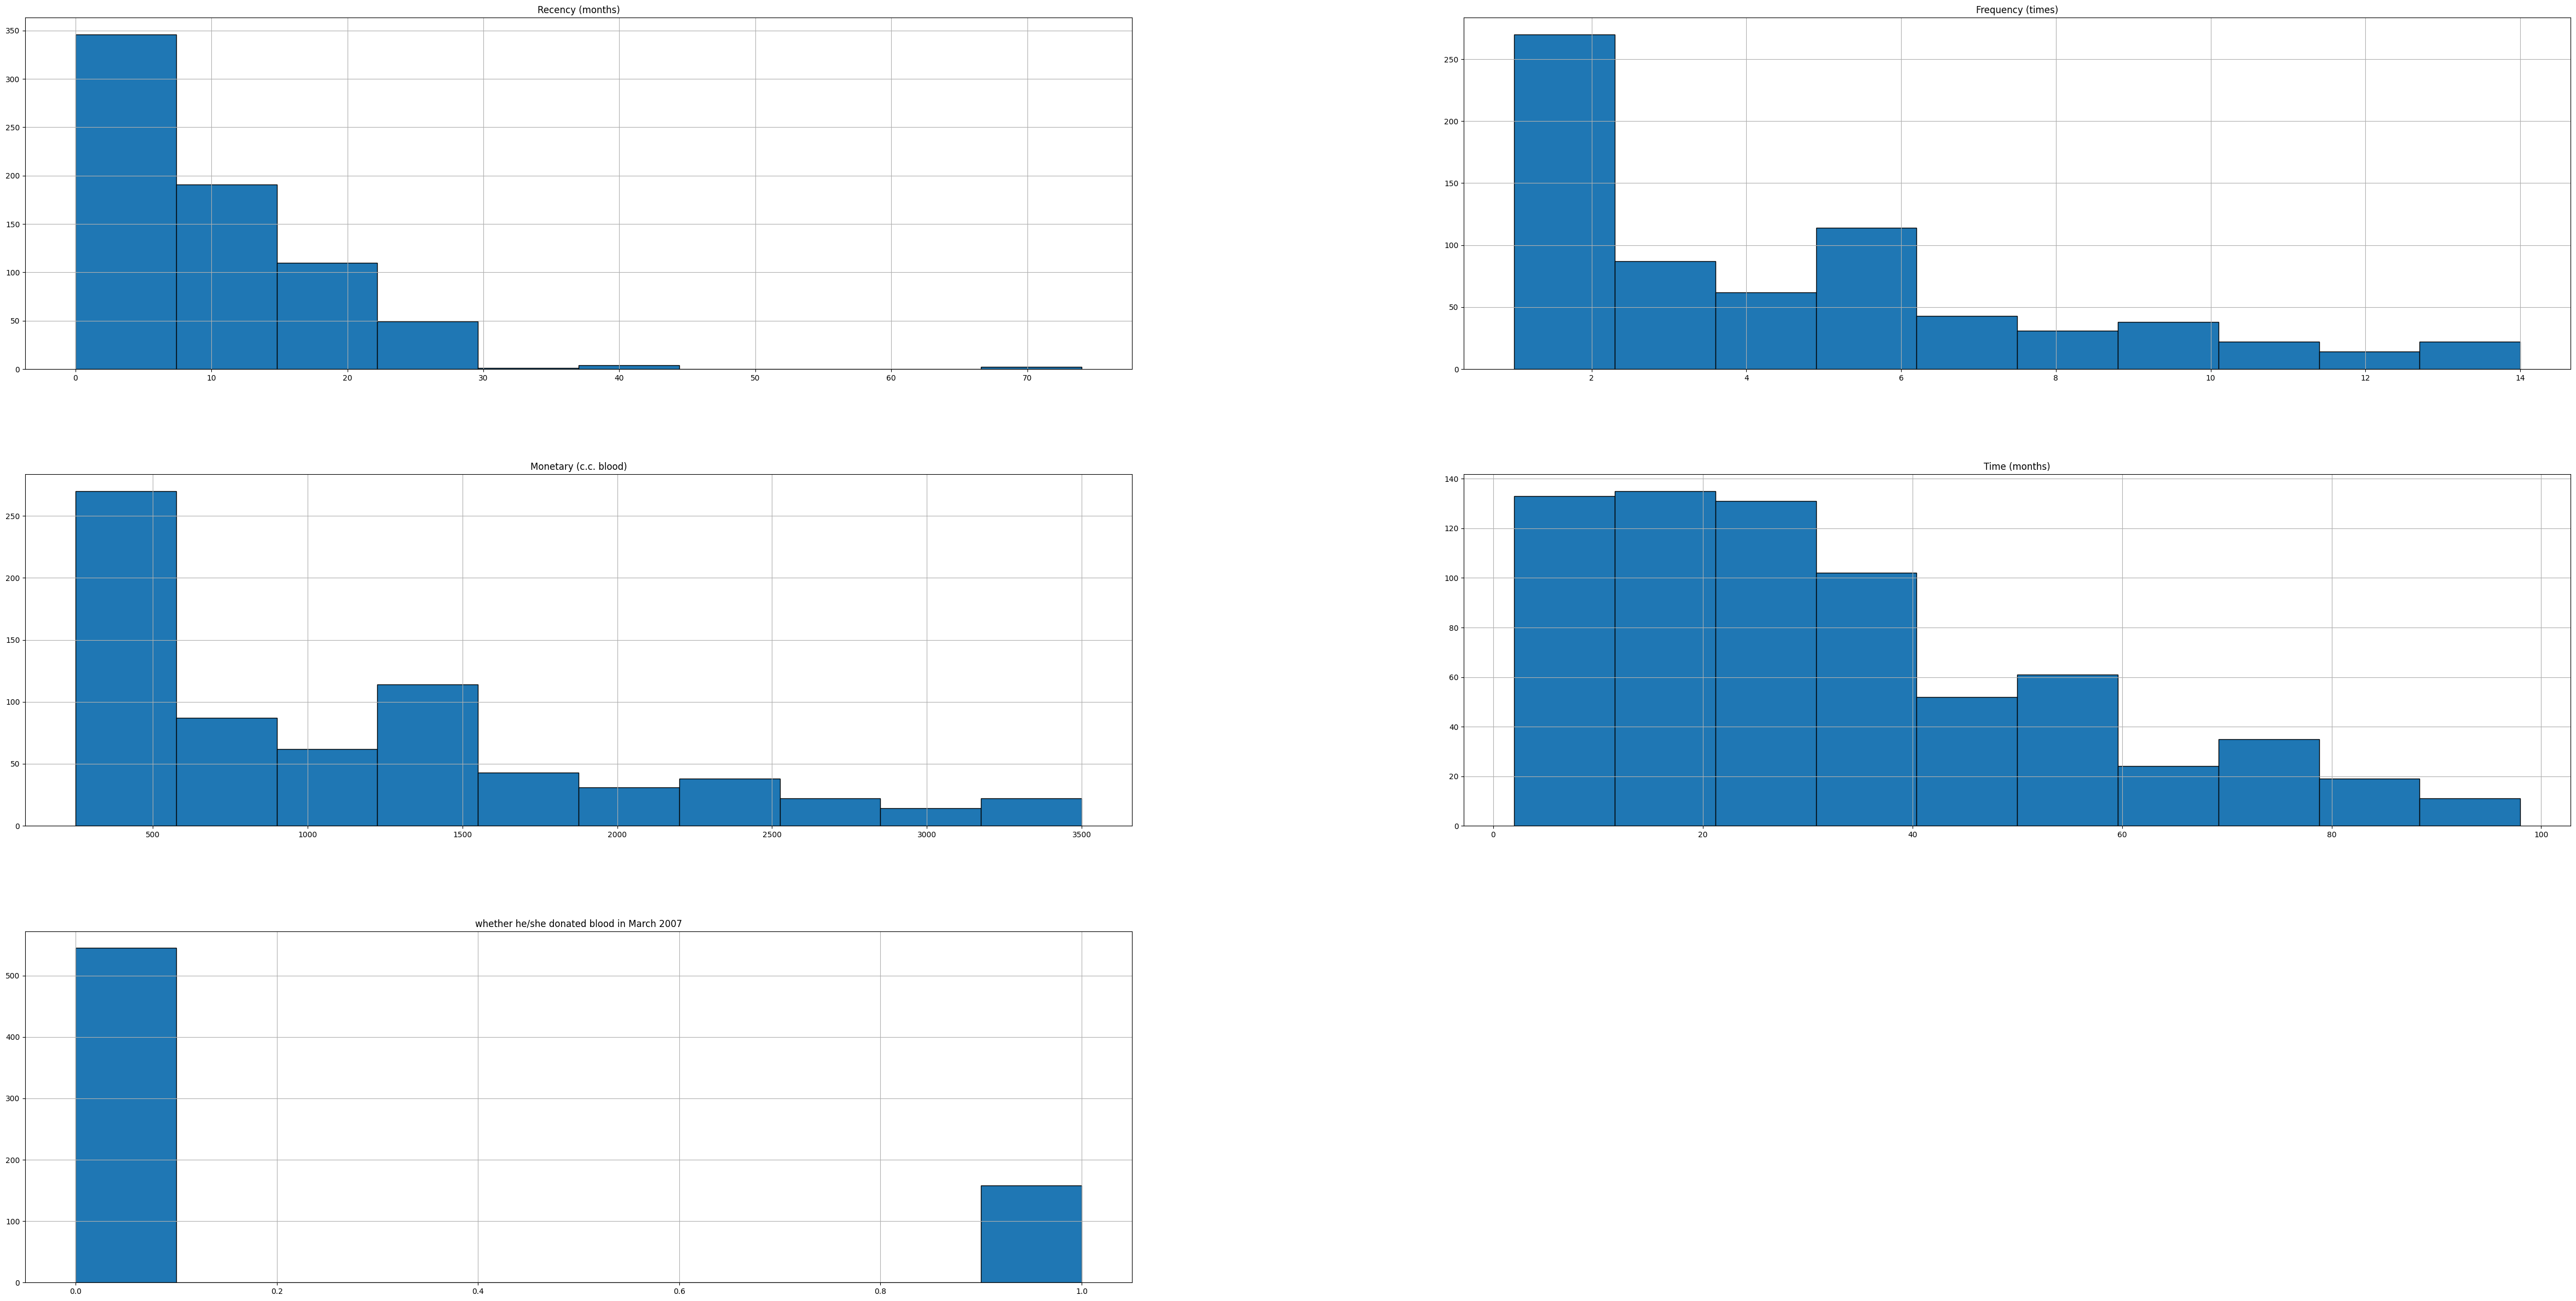

In [ ]:
df.hist(figsize=(60,30), edgecolor='black')
plt.show()

**UNIVARIATE ANALYSIS**

<Axes: xlabel='whether he/she donated blood in March 2007', ylabel='count'>

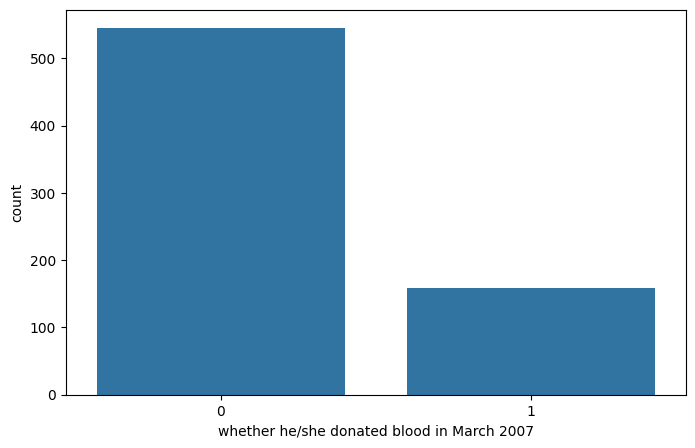

In [ ]:
sns.countplot(x='whether he/she donated blood in March 2007',data=df)


<Axes: xlabel='Frequency (times)', ylabel='count'>

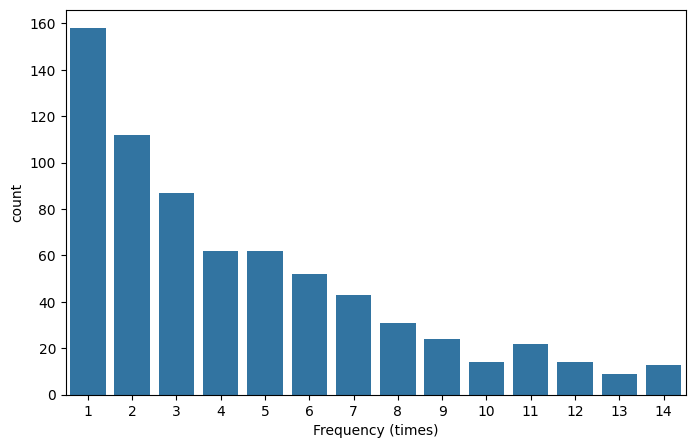

In [ ]:
sns.countplot(x='Frequency (times)',data=df)

**BIVARIATE ANALYSIS**

<Axes: xlabel='Monetary (c.c. blood)', ylabel='Time (months)'>

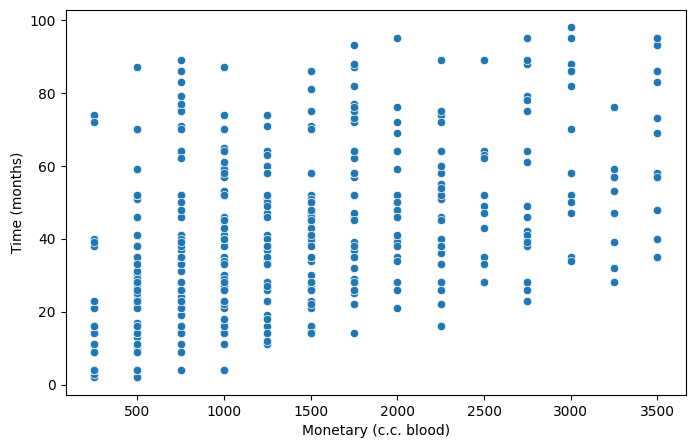

In [ ]:
sns.scatterplot(x=df['Monetary (c.c. blood)'],y=df['Time (months)'])

<Axes: xlabel='Monetary (c.c. blood)', ylabel='Frequency (times)'>

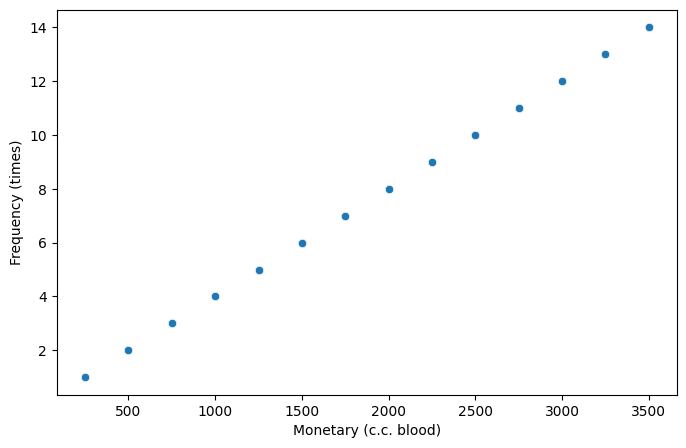

In [ ]:
sns.scatterplot(x=df['Monetary (c.c. blood)'],y=df['Frequency (times)'])

**MULTIVARIATE ANALYSIS**




<Axes: >

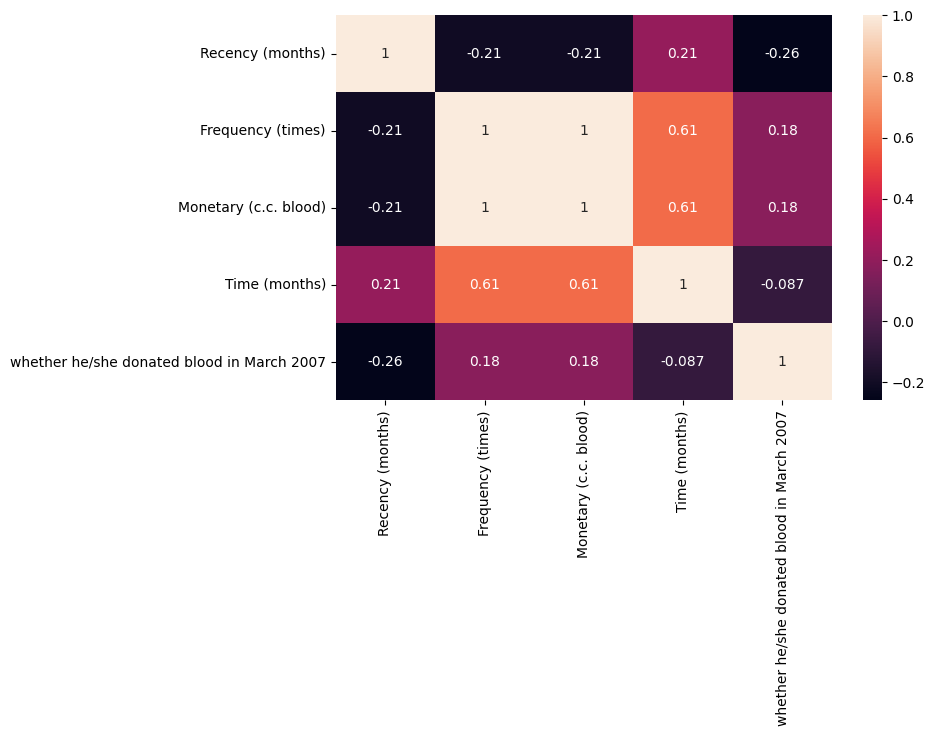

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.drop(['whether he/she donated blood in March 2007'],axis=1)
y=df['whether he/she donated blood in March 2007']


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data=load_iris()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**MODEL BUILDING**

In [ ]:
x

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
1,0,13,3250,28
5,4,4,1000,4
6,2,7,1750,14
7,1,12,3000,35
8,2,9,2250,22
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Shape of x_taian:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_taian: (120, 4)
Shape of y_train: (120,)
Shape of x_test: (30, 4)
Shape of y_test: (30,)


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data=load_iris()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
logreg=LogisticRegression()



In [ ]:
logreg.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_LOGREG=logreg.predict(X_test)

In [ ]:
print('Training Set: ',logreg.score(X_train,y_train))
print('Test Set: ',logreg.score(X_test,y_test))

Training Set:  0.9666666666666667
Test Set:  0.9333333333333333


In [ ]:
from sklearn import metrics # Import the metrics module
logreg=LogisticRegression()
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_LOGREG)*100)

Accuracy: 93.33333333333333


In [ ]:
logreg.fit(X_train,y_train)
accuracy_LOGREG=logreg.score(X_test,y_test)
print('Accuracy_LOGREG:',accuracy_LOGREG*100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy_LOGREG: 93.33333333333333


In [ ]:
from sklearn import metrics # Import the metrics module
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_LOGREG))

[[ 8  0  0]
 [ 0  8  1]
 [ 0  1 12]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_LOGREG))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



**RANDOMFOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_forest= RandomForestClassifier(random_state=42)
rand_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_RF=rand_forest.predict(X_test)

In [ ]:
predictionRF=rand_forest .predict(X_test)
#checking the accuracy on the training set
print('Training set :', rand_forest.score(X_train,y_train))
#checking the accuracy on the testing set
print('Testing set :', rand_forest.score(X_test,y_test))

Training set : 1.0
Testing set : 0.9


In [ ]:
accuracy_RF=rand_forest.score(X_test, y_test)
print('Accuracy_RF: ', accuracy_RF*100)

Accuracy_RF:  90.0


In [ ]:
from sklearn import metrics # Import the metrics module
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_RF))

[[ 8  0  0]
 [ 0  8  1]
 [ 0  2 11]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      0.89      0.84         9
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



**SVM**

In [ ]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred_SVC=svm.predict(X_test)

In [ ]:
print('Training Set:',svm.score(X_train,y_train))
print('Testing Set:',svm.score(X_test,y_test))

Training Set: 0.9583333333333334
Testing Set: 0.9


In [ ]:
accuracy_SVC=svm.score(X_test,y_test)
print('Accuracy_SVM:',accuracy_SVC*100)

Accuracy_SVM: 90.0


In [ ]:
from sklearn import metrics # Import the metrics module
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_SVC))

[[ 8  0  0]
 [ 0  8  1]
 [ 0  2 11]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      0.89      0.84         9
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
#creating a table to compare the accuracies of each model
accuracy_df = pd.DataFrame({
      'Model':['Logisticregression','Randomforest','SVM'],
      'Accuracy': [accuracy_LOGREG*100,accuracy_RF*100,accuracy_SVC*100]})
print(accuracy_df)

                Model   Accuracy
0  Logisticregression  93.333333
1        Randomforest  90.000000
2                 SVM  90.000000


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Comparison of Model Accuracies')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Accuracy')

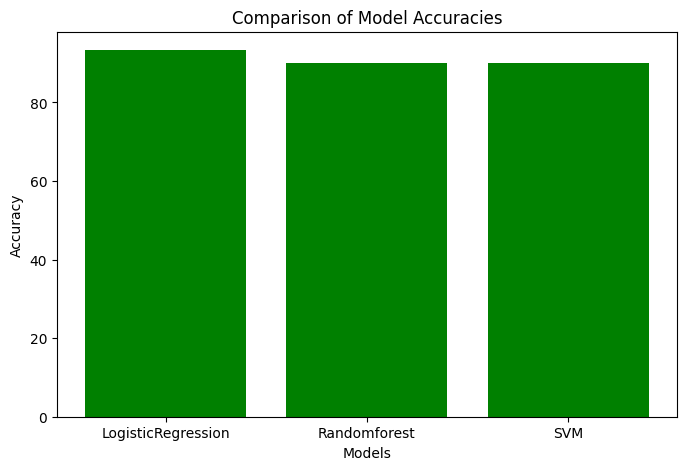

In [ ]:
models=['LogisticRegression','Randomforest','SVM']
accuracy=[accuracy_LOGREG*100,accuracy_RF*100,accuracy_SVC*100]
plt.bar(models, accuracy, color='green')
#Add titleand axis labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')


In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
example=[[2,50,12500,98]]
result=logreg.predict(example)
print(result)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[2]


In [ ]:
rand_forest= RandomForestClassifier(random_state=42)
rand_forest.fit(X_train,y_train)
example=[[2,50,12500,98]]
result=rand_forest.predict(example)
print(result)

RandomForestClassifier(random_state=42)

[2]


In [ ]:
svm= SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)
example=[[2,50,12500,98]]
result=svm.predict(example)
print(result)

SVC(random_state=0)

[2]


In [ ]:
prediction=logreg.predict(np.array([[2,50,12500,98]])) # Remove extra dimension
print("The change of Donation by donar for a given factor is:",prediction)

The change of Donation by donar for a given factor is: [2]


In [ ]:
prediction=logreg.predict(np.array([[18,16,4000,3]])) # Remove extra dimension
print("The change of Donation by donar for a given factor is:",prediction)

The change of Donation by donar for a given factor is: [2]


**MODEL DEPLOYMENT**

In [ ]:
import pickle
pickle.dump(logreg,open('model.pkl','wb'))